TensorFlow

1.첫 번쨰 Simple Linear regression(선형 회귀)

    Linear regression : Data set을 가장 잘 대변하는 직선의 방정식
        cost = how fit the line to our Data => cost(x) = H(x) - y, x in X, y in Y
        cost(w) = Σ(Wxi(예측값, 가설) - Yi)^2 / m, i range 1 to m-1
        
        hypothesis = W*x + b => can be Simplified as W*x
        
 
 코드로 구현해 보자.

In [77]:
import tensorflow as tf

tf.enable_eager_execution() # 텐서플로 변수를 더욱 직관적으로 관찰하기 위해

In [78]:
X = [1,2,3,4,5] #입력 값
Y = [1,2,3,4,5] #출력 값

#다음 데이터를 유추하려면?
#데이터에 Set에 가장 유사한 직선의 방정식을 따라가면 된다.

W = tf.Variable(3.0)
b = tf.Variable(0.5)

W, b, W.numpy(), b.numpy()

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.5>,
 3.0,
 0.5)

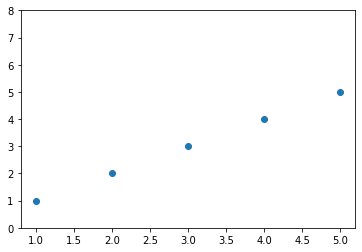

In [79]:
import matplotlib.pyplot as plt

plt.plot(X, Y, "o")
plt.ylim(0, 8)
plt.show()

In [80]:
hypothesis = W * X + b # H(x), x in X Formal hypothesis
hyp = W * X # Simplified hypothesis

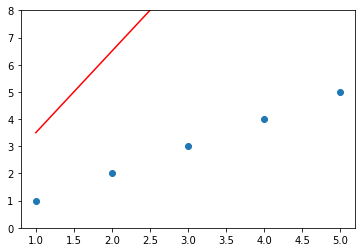

In [81]:
plt.plot(X,hypothesis, "r")
plt.plot(X, Y, "o")
plt.ylim(0,8)
plt.show()
# showing Graph based on Formal hypothesis 

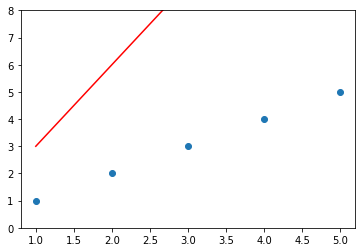

In [82]:
plt.plot(X, hyp, "r")
plt.plot(X, Y, "o")
plt.ylim(0,8)
plt.show()
# showing Graph based on Simplified hypothesis 

Cost를 구해보자

In [83]:
learning_data = 0.01 # 학습한 값을 결과에 얼마만큼 반영할지를 결정하는 상수

cost_1 = tf.reduce_mean(tf.square(hypothesis - Y))
cost_2 = tf.reduce_mean(tf.square(hyp - Y))

In [106]:
with tf.GradientTape() as tape1:
    hypothesis = W*X + b
    cost_1 = tf.reduce_mean(tf.square(hypothesis - Y))
    # GradientTape를 통해 자동미분을 해 기울기 값을 얻는다.
with tf.GradientTape() as tape2:
    hyp = W*X
    cost_2 = tf.reduce_mean(tf.square(hyp - Y))
    # GradientTape를 통해 자동미분을 해 기울기 값을 얻는다.
cost_1, cost_2

w_grad, b_grad = tape1.gradient(cost_1, [W, b])
w_simple_grad = tape2.gradient(cost_2, W)

In [107]:
w_grad, b_grad, w_simple_grad

(<tf.Tensor: id=36178, shape=(), dtype=float32, numpy=-64.200005>,
 <tf.Tensor: id=36171, shape=(), dtype=float32, numpy=-17.800001>,
 <tf.Tensor: id=36199, shape=(), dtype=float32, numpy=-59.400005>)

In [96]:
W.assign_sub(learning_data*w_grad)
b.assign_sub(learning_data*b_grad)

W.numpy(), b.numpy()

(-1.7000002, -0.79999995)

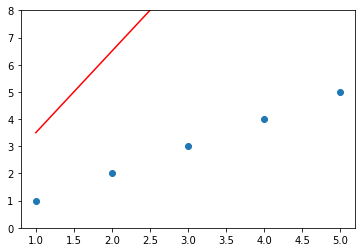

In [95]:
plt.plot(X, Y, "o")
plt.plot(X, hypothesis, "r-")
plt.ylim(0, 8)
plt.show()

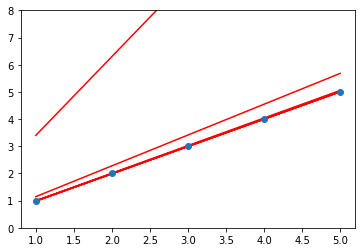

In [67]:
W = tf.Variable(2.9)
b = tf.Variable(0.5)

for k in range(100):
    with tf.GradientTape() as tape1:
        hypothesis = W*X + b
        cost_1 = tf.reduce_mean(tf.square(hypothesis - Y))
    w_grad, b_grad = tape1.gradient(cost_1, [W, b])
    W.assign_sub(learning_data*w_grad)
    b.assign_sub(learning_data*b_grad)
    if k % 10 == 0:
        plt.plot(X, hypothesis, "r-")

plt.plot(X, Y, "o")
plt.ylim(0, 8)
plt.show() # Complete code with Linear regression using Formal hypothesis

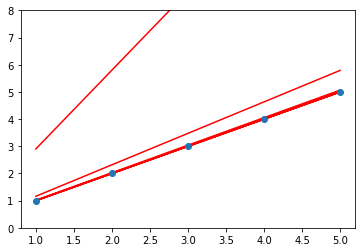

In [108]:
W = tf.Variable(2.9)
b = tf.Variable(0.5)

for k in range(100):
    with tf.GradientTape() as tape2:
        hypothesis = W*X
        cost_2 = tf.reduce_mean(tf.square(hypothesis - Y))
    w_grad = tape2.gradient(cost_2, W)
    W.assign_sub(learning_data*w_grad)
    if k % 10 == 0:
        plt.plot(X, hypothesis, "r-")
        
plt.plot(X, Y, "o")
plt.ylim(0, 8)
plt.show() # Complete code with Linear regression using Simplified hypothesis